# Testes com busca (euclidean distances) utilizando feature extraction do imagenet

In [1]:
import numpy as np
import os
import random
import tensorflow as tf

from sklearn.metrics.pairwise import euclidean_distances
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time


caminho_bases = os.path.join('..', 'bases', 'vazios')
caminho_train = os.path.join(caminho_bases, 'train')
caminho_test = os.path.join(caminho_bases, 'test')

SIZE = (224, 224)

# Recupera imagens

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
)
train_generator = datagen.flow_from_directory(
    caminho_train,
    target_size=SIZE,
    batch_size=512,
    class_mode='binary',
    shuffle=True
)
validation_generator = datagen.flow_from_directory(
    caminho_test,
    target_size=SIZE,
    batch_size=256,
    class_mode='binary',
    shuffle=True
)

Found 20845 images belonging to 2 classes.
Found 2317 images belonging to 2 classes.


# Models

In [49]:
base_model = DenseNet121(weights='imagenet',
                         input_shape=(*SIZE, 3), 
                         include_top=False,
                         pooling='max')

In [50]:
base_model_avg = DenseNet121(weights='imagenet',
                         input_shape=(*SIZE, 3), 
                         include_top=False,
                         pooling='avg')

In [51]:
batch, labels = next(validation_generator)
features_batch = base_model.predict(batch)

In [65]:
ind = random.randint(0, len(features_batch))
distances = euclidean_distances([features_batch[ind]], features_batch)
sequence = np.argsort(distances)[0]
print(ind, sequence)

35 [ 35 180  59 242  60 215  70  74  90 160 149  27 140 126 117  92 111  69
 128  67 244 224 208 252 206 227 150 238 207 226 197  47 211  96  20 245
   0 116  25  58  91  94  98 240 194 151 100  80 187 214  30 186  88  34
 209  54 216 204  51  43 231 164  11 139 205 110  68  49 145 123 108 200
 166 198 248  22 148 119 222  73 225 241  53  86  15 113  77 146  85 239
 196  81  24   6 163  64  19  26  41  46 167  93 232  57 154  61  32 237
 188 137 152 159 253 250 114 235 189 153  63  82 202 104 121 122   3 251
   9 120 223 236   4 168  79 101 103  16  33   1 183 178 133  99 170  29
 174 172 246  72 165  65  95  45  71 247 199 129   2 213  55 218 185  38
 147  83  31   5  75 135 184  97  52 191 118 203 221 243  40 158 107 255
 112 217 125 179 124   8 115 105  44  66  87 177 136 169  42  78 193 173
 229 234 134 210  10  84 144  76  13  14 254  39 143 127  48 219 176  28
 161 109 182  50 220  62 181  36 138 201 157 192 233 142 230 132 195 162
 228  89  12   7 131 171 190 212 156 102 141  21

In [66]:
print(labels[ind], labels[sequence] )

0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


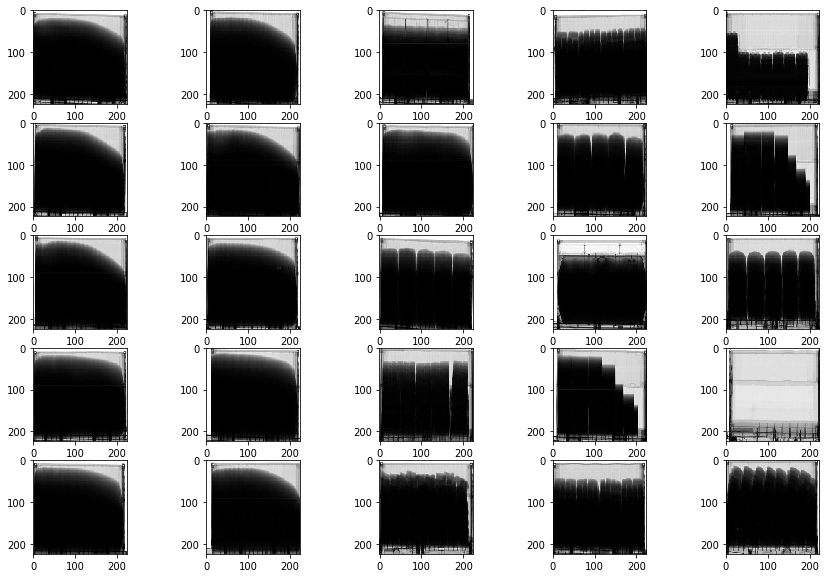

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 5, figsize=(15, 10))
for row in range(5):
    for col in range(5):
        img_ind = row * 5 + col
        axes[col, row].imshow(batch[sequence[img_ind]])


In [55]:
ind = random.randint(0, len(features_batch))
distances = euclidean_distances([features_batch[ind]], features_batch)
sequence = np.argsort(distances)[0]
print(ind, sequence)

198 [198  58 110 150  80 172 141  46  43 194 208 113 100  91 164 183 111 199
 232 143  98 239  88  54 240 182 145  24 193 151  72 123 206 187 247 135
 166   7 126 230  94  11 204 216 119 210 254 136  85  16  81 250 226 137
  12  73 171 184  63 146  75  93 196  66 205 213  15  32 212 163 152  30
 200 167 103 246  95 245 177  57 252  25 139 127 117  22  14  78  53 154
  79 236   4  77   0 101  39 144  82 227 253  62 134  64  65  28 223 115
 229 128 189 129 176  13 235 197 238   6  86  33 105 203 124 191 237 112
  99  38 224 158 244 107 192 179  55 159  76  89 104   5 155   9 173 243
 174 118   2  49 222  18 125  26  61 185 138 122   8  47  41 140  34 108
 156 228 170  17 231 132 202 188 120  42 169  23 121 178 201 161 248 233
 148  40 165 133  36 218  45 195 131  83 234  97  52 255 153  10 217  19
  44 102  92  67 130 251 225  84  87 168  71  31 221  37  29   1  50 211
  20  48 181 149 157 175 220 219 147 214 209 190 249  68 162   3  56  21
  51  96 109 142  70 106 241  35  59  60 215  6

In [56]:
print(labels[ind], labels[sequence])

0.0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


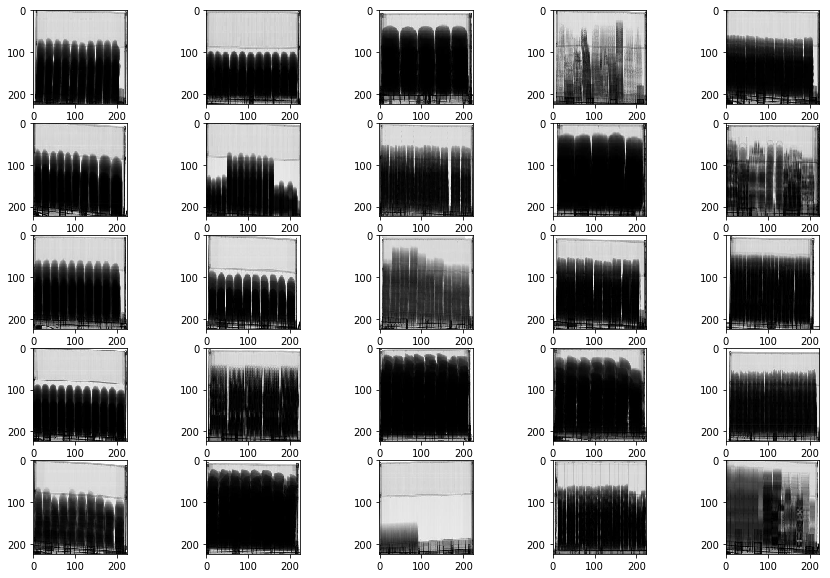

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 5, figsize=(15, 10))
for row in range(5):
    for col in range(5):
        img_ind = row * 5 + col
        axes[col, row].imshow(batch[sequence[img_ind]])


In [58]:
def get_batch(generator, model=base_model):
    batch, labels = next(validation_generator)
    features_batch = model.predict(batch)
    return features_batch, labels
    
def get_sequence(features, ind):
    distances = euclidean_distances([features[ind]], features)
    sequence = np.argsort(distances)[0]
    return sequence


In [59]:
# Coincidências de classe em 10 itens
train_generator.reset()
for r in range(1, 6):
    X, y = get_batch(train_generator)
    acerto_batch = 0
    for s in range(20):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:10])
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / 200))


Acertos no batch 1: 0.81
Acertos no batch 2: 0.57
Acertos no batch 3: 0.83
Acertos no batch 4: 0.88
Acertos no batch 5: 0.82


In [60]:
validation_generator.reset()
for r in range(1, 6):
    X, y = get_batch(validation_generator)
    acerto_batch = 0
    for s in range(20):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:10])
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / 200))


Acertos no batch 1: 0.84
Acertos no batch 2: 0.93
Acertos no batch 3: 0.92
Acertos no batch 4: 0.84
Acertos no batch 5: 0.92


In [61]:
# Coincidências de classe em 20 itens
train_generator.reset()
for r in range(1, 11):
    X, y = get_batch(train_generator)
    acerto_batch = 0
    for s in range(20):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:20])
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / 400))


Acertos no batch 1: 0.84
Acertos no batch 2: 0.69
Acertos no batch 3: 0.92
Acertos no batch 4: 0.86
Acertos no batch 5: 0.33
Acertos no batch 6: 0.84
Acertos no batch 7: 0.89
Acertos no batch 8: 0.88
Acertos no batch 9: 0.86
Acertos no batch 10: 0.80


In [62]:
from collections import Counter
# Coincidências de classe em 20 itens - por classe
train_generator.reset()
acerto_total = Counter()
total = Counter()
for r in range(1, 11):
    X, y = get_batch(train_generator)
    acerto_batch = 0
    for s in range(20):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:20])
        total[y[ind]] += 20
        acerto_total[y[ind]] += acertos
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / 400))


Acertos no batch 1: 0.79
Acertos no batch 2: 0.92
Acertos no batch 3: 0.91
Acertos no batch 4: 0.97
Acertos no batch 5: 0.33
Acertos no batch 6: 0.86
Acertos no batch 7: 0.79
Acertos no batch 8: 0.84
Acertos no batch 9: 0.86
Acertos no batch 10: 0.85


In [63]:
print('0 = não vazio\n1 = vazio')
for classe in [0, 1]:
    print('Acerto classe {}: {:d} de {:d} ({:0.2f})'.format(
           classe, acerto_total[classe], total[classe],
           (acerto_total[classe] / total[classe]) )
         )


0 = não vazio
1 = vazio
Acerto classe 0: 1456 de 1920 (0.76)
Acerto classe 1: 1792 de 2080 (0.86)


## Repetir teste utilizando modelo AvgPool

In [64]:
from collections import Counter
# Coincidências de classe em 20 itens - por classe
train_generator.reset()
acerto_total = Counter()
total = Counter()
for r in range(1, 11):
    X, y = get_batch(train_generator, base_model_avg)
    acerto_batch = 0
    for s in range(20):
        ind = random.randint(0, len(y) - 1)
        seq = get_sequence(X, ind)
        acertos = sum(y[ind] ==  y[seq][:20])
        total[y[ind]] += 20
        acerto_total[y[ind]] += acertos
        # print(s, acertos)
        acerto_batch += acertos
    print('Acertos no batch {:d}: {:0.2f}'.format(r, acerto_batch / 400))

print('0 = não vazio\n1 = vazio')
for classe in [0, 1]:
    print('Acerto classe {}: {:d} de {:d} ({:0.2f})'.format(
           classe, acerto_total[classe], total[classe],
           (acerto_total[classe] / total[classe]) )
         )


Acertos no batch 1: 0.83
Acertos no batch 2: 0.86
Acertos no batch 3: 0.85
Acertos no batch 4: 0.80
Acertos no batch 5: 0.33
Acertos no batch 6: 0.82
Acertos no batch 7: 0.83
Acertos no batch 8: 0.82
Acertos no batch 9: 0.82
Acertos no batch 10: 0.79
0 = não vazio
1 = vazio
Acerto classe 0: 1465 de 2140 (0.68)
Acerto classe 1: 1637 de 1860 (0.88)
